In [72]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [73]:
import warnings
warnings.filterwarnings('ignore')

## Importing Data

In [74]:
data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [75]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

In [76]:
print (f'{"The features in Titanic Dataset are as follows:":-^100}')
n = 1
for each in data.columns:
    print(str(n)+'. '+each)
    n+=1

--------------------------The features in Titanic Dataset are as follows:---------------------------
1. PassengerId
2. Survived
3. Pclass
4. Name
5. Sex
6. Age
7. SibSp
8. Parch
9. Ticket
10. Fare
11. Cabin
12. Embarked


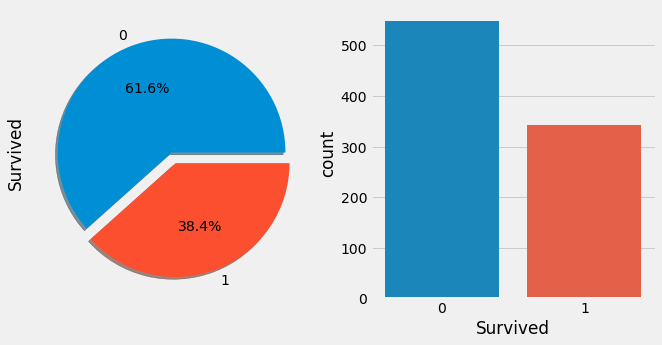

In [77]:
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(1,2, figsize=(10,5))
data['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)

sb.countplot(data['Survived'], ax=ax[1])
plt.show()


We see that only 38.4% of the Passengers survived. 
Next, let's see how different features are impacting survival rate.

## Feature Analysis

In [78]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see there are 177 NULL Values in Age and 687 NULL values in Cabin. We will address this in later stage. 

### Survival Based on Sex

In [79]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

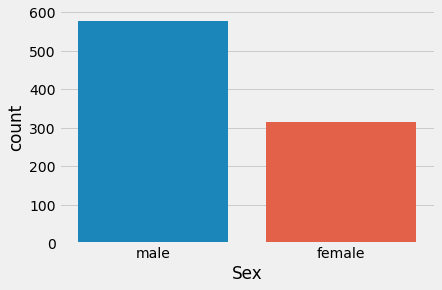

In [80]:
sb.countplot('Sex', data=data)
plt.show()

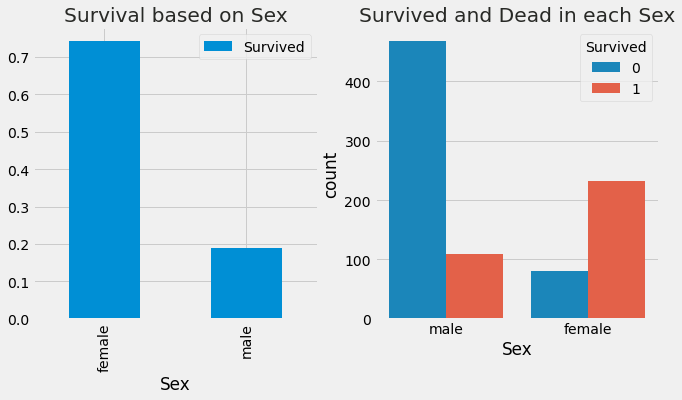

In [81]:
f, ax = plt.subplots(1,2, figsize=(10,5))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survival based on Sex", color='#282926')
sb.countplot('Sex', hue='Survived', data=data, ax=ax[1] )
ax[1].set_title("Survived and Dead in each Sex", color='#282926')

plt.show()

We see more than 70% of the women have surived which is significantly more the male survivors (<20%)
We can say, this is a very significant feature for our prediction.

### Survival Based on Pclass

In [82]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='bwr')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


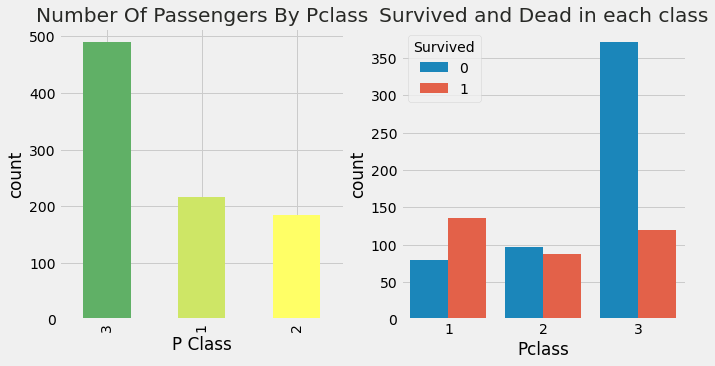

In [83]:
f,ax=plt.subplots(1,2,figsize=(10,5))

data['Pclass'].value_counts().plot.bar(color=['#60b066','#cee666','#ffff66'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass', color='#282926')
ax[0].set_ylabel('count')
ax[0].set_xlabel('P Class')

sb.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived and Dead in each class', color='#282926')

plt.show()

We see a clear relationship between Survival and Class in which the passesngers were travelling, 
Clearly many of those who survived are from first class. 

Let's dig in further, by including the Sex factor along with the P CLass.

In [84]:
pd.crosstab([data.Pclass,data.Sex],data.Survived,margins=True).style.background_gradient(cmap='bwr')

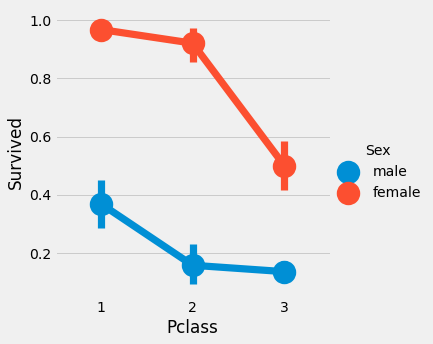

In [85]:
sb.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

We see that women in the First Class were given the priority over others and hence 91 out of 94 women have survived.
We also see that the men in the Third Class were given the least priority while rescue operations, only 47 out 347 men have survived.

### Survival Based on Age

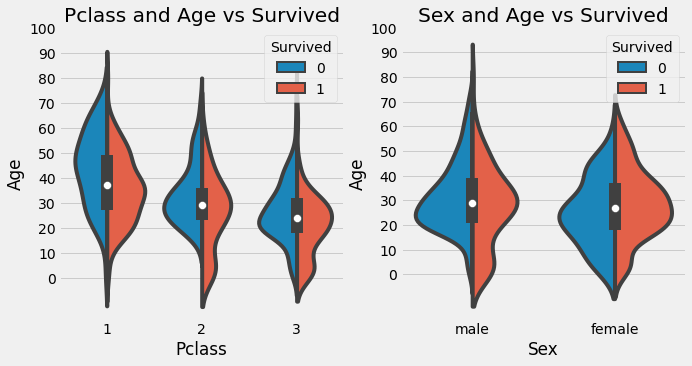

In [86]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sb.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sb.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

We see that the Children have survived irrespective of Class and Sex.
In Class 1 - Males of agegroup 20-50 survived more than Females. 
The chances of Survival have significantly decreased for Older males (>50)

In [87]:
data['Age'].isnull().sum()

177

In [88]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Let's categorise the data based on the salutations in the name, and then use the mean of ages in each category to fill in the NULL values

In [89]:
data['Initial']=0
for each in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') 

In [90]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [91]:
### Performing similar action on test data
test_data['Initial']=0
for each in data:
    test_data['Initial']=test_data.Name.str.extract('([A-Za-z]+)\.')
test_data['Initial'].unique()    

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [92]:
pd.crosstab(data.Initial,data.Sex,margins=True).style.background_gradient(cmap='bwr')

Sex,female,male,All
Initial,,,
Capt,0,1,1
Col,0,2,2
Countess,1,0,1
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Master,0,40,40


Let's correct the miss spelt values

In [93]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [94]:
### Performing similar action on test data
test_data['Initial'].replace(['Ms', 'Col', 'Rev', 'Dr', 'Dona'],
                        ['Miss','Other','Other','Mr','Mr'],inplace=True)

In [95]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [96]:
### Performing similar action on test data
test_data.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.151351
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

Filling the NULL values with the mean age in each category

In [97]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [98]:
### Performing similar action on test data
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age']=32
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age']=39
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age']=7
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age']=22
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Other'),'Age']=43

In [99]:
data['Age'].isnull().sum()

0

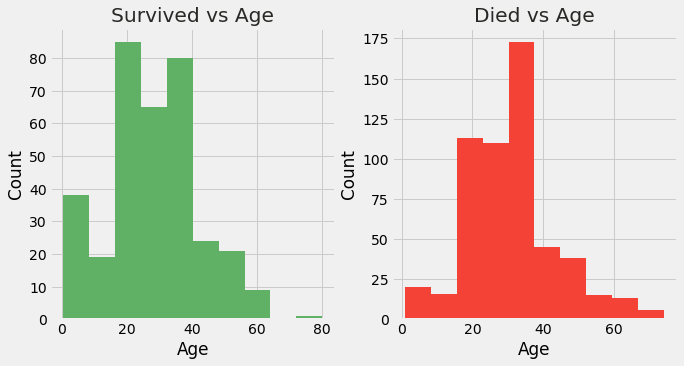

In [100]:
f, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(data[data['Survived']==1]['Age'], color='#60b066')
ax[0].set_title('Survived vs Age', color='#282926')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[1].hist(data[data['Survived']==0]['Age'], color='#F44336')
ax[1].set_title('Died vs Age', color='#282926')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')

plt.show()

We see that the maximum number of individuals who died were of age group 30-40. 
We also see that maximum number of chidren were saved (Because Womwn and Children have been given high priority) 

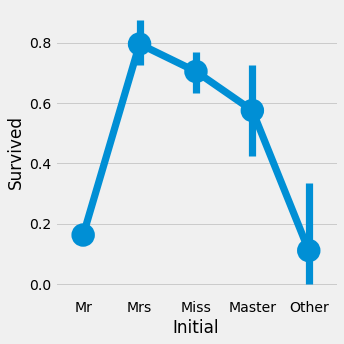

In [101]:
sb.factorplot('Initial','Survived',data=data)
plt.show()

The above factor plot also confirms women and children were given priority.

### Survival based on Embarked

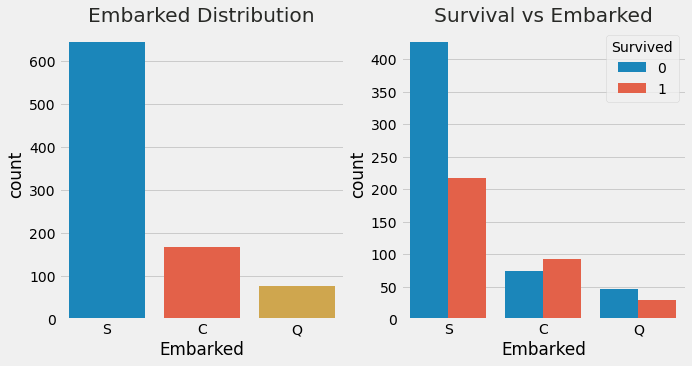

In [102]:
f, ax = plt.subplots(1,2, figsize=(10,5))
sb.countplot(data.Embarked, ax=ax[0])
ax[0].set_title('Embarked Distribution', color='#282926')
sb.countplot('Embarked', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survival vs Embarked', color='#282926')

plt.show()

We see maximum number of people have boarded from S (Southampton)

Earlier we saw NULL values in Embarked, we shall replace them with Southampton.

In [103]:
data['Embarked'].isnull().sum()

2

In [104]:
data['Embarked'].fillna('S', inplace=True)

In [105]:
data['Embarked'].isnull().sum()

0

### Survival based on SibSp and Parch

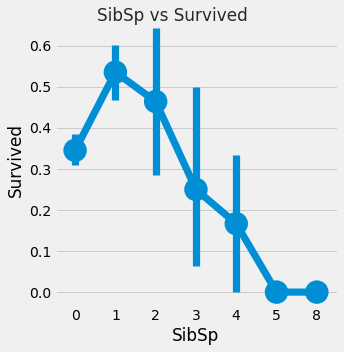

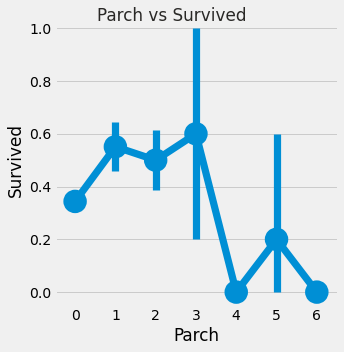

In [106]:
ax=sb.factorplot('SibSp','Survived',data=data)
ax.fig.suptitle('SibSp vs Survived', color='#292826')
plt.show()

ax=sb.factorplot('Parch','Survived',data=data)
ax.fig.suptitle('Parch vs Survived', color='#292826')
plt.show()

We see that survival is maximum with those who travelled alone, families with 5+ members have not been able to survive.

### Fare

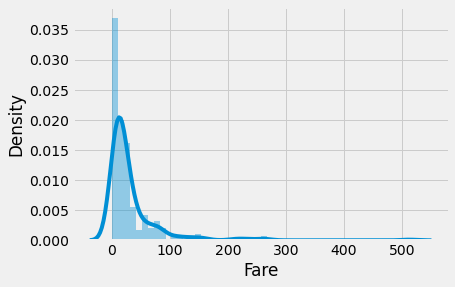

In [107]:
sb.distplot(data['Fare'])
plt.show()

In [108]:
print("Maximum Fare: " + str(data['Fare'].max()))
print("Minimum Fare: " + str(data['Fare'].min()))
print("Average Fare: " + str(data['Fare'].mean()))


Maximum Fare: 512.3292
Minimum Fare: 0.0
Average Fare: 32.2042079685746


# Feature Engineering and Data Cleaning

#### First Let's Convert Continuous Values into Categorical Values as this leads to better performance of the model

### Age Groups

In [109]:
print("Maximum Age: " + str(data['Age'].max()))
print("Minimum Age: " + str(data['Age'].min()))
print("Average Age: " + str(data['Age'].mean()))

Maximum Age: 80.0
Minimum Age: 0.42
Average Age: 29.841941638608304


we have people from age range 0.4 to 80 years, let's categorize them into different age groups.

In [110]:
data['Age_Group']=0
data.loc[data['Age']<=16,'Age_Group']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_Group']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_Group']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_Group']=3
data.loc[data['Age']>64,'Age_Group']=4

In [111]:
### Performing similar action on test data
test_data['Age_Group']=0
test_data.loc[test_data['Age']<=16,'Age_Group']=0
test_data.loc[(test_data['Age']>16)&(test_data['Age']<=32),'Age_Group']=1
test_data.loc[(test_data['Age']>32)&(test_data['Age']<=48),'Age_Group']=2
test_data.loc[(test_data['Age']>48)&(test_data['Age']<=64),'Age_Group']=3
test_data.loc[test_data['Age']>64,'Age_Group']=4

In [112]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [113]:
data['Age_Group'].value_counts().to_frame().style.background_gradient(cmap='bwr')

,Age_Group
1,382
2,325
0,104
3,69
4,11


In [114]:
test_data['Age_Group'].value_counts().to_frame().style.background_gradient(cmap='bwr')

,Age_Group
1,250
2,91
0,38
3,37
4,2


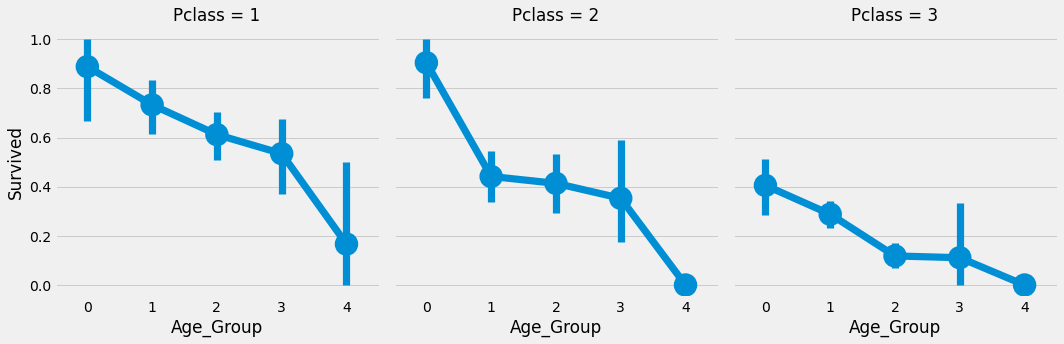

In [115]:
sb.factorplot('Age_Group','Survived',data=data,col='Pclass')
plt.show()

We see that survival rate decreases as the age 

### Fare Range

In [116]:
data['Fare_Range']=pd.qcut(data['Fare'],4) #Making 4 cuts on Fare Column
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='bwr')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [117]:
### Performing similar action on test data
test_data['Fare_Range']=pd.qcut(test_data['Fare'],4) #Making 4 cuts on Fare Column
test_data['Fare_Range'].value_counts().to_frame().style.background_gradient(cmap='bwr')

,Fare_Range
"(-0.001, 7.896]",114
"(14.454, 31.5]",105
"(31.5, 512.329]",102
"(7.896, 14.454]",96


We see that as the Fare Range increases, the chances of survival increases.

In [118]:
data['Fare_Range']

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare_Range, Length: 891, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [119]:
data['Fare_Cat']=0
data.loc[data['Fare']<=7.91,'Fare_Cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_Cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_Cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_Cat']=3

In [120]:
### Performing similar action on test Data
test_data['Fare_Cat']=0
test_data.loc[test_data['Fare']<=7.91,'Fare_Cat']=0
test_data.loc[(test_data['Fare']>7.91)&(test_data['Fare']<=14.454),'Fare_Cat']=1
test_data.loc[(test_data['Fare']>14.454)&(test_data['Fare']<=31),'Fare_Cat']=2
test_data.loc[(test_data['Fare']>31)&(test_data['Fare']<=513),'Fare_Cat']=3

In [121]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_Group,Fare_Range,Fare_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,"(7.91, 14.454]",1


## Converting Strings into Numeric Values

In [122]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [123]:
### Performing similar action on test Data
test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### Dropping Unwanted Features

Name, Passenger ID and Ticket must be dropped as we cannot categorise them.
Age can be droped as we have create Age Groups.
Fare and Fare Range can be dropped as we have created Fare_Cat
Cabin must be dropped due to prsence of huge number of NULL values.

In [124]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [125]:
### Performing similar action on test Data
PassengerId = test_data['PassengerId']
test_data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [126]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_Group,Fare_Cat
0,0,3,0,1,0,0,0,1,0
1,1,1,1,1,0,1,1,2,3
2,1,3,1,0,0,0,2,1,1
3,1,1,1,1,0,0,1,2,3
4,0,3,0,0,0,0,0,2,1


In [127]:
test_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_Group,Fare_Cat
0,3,0,0,0,2,0,2,0
1,3,1,1,0,0,1,2,0
2,2,0,0,0,2,0,3,1
3,3,0,0,0,0,0,1,1
4,3,1,1,1,0,1,1,1


# Building Model and Predicting

In [128]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

In [129]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Assigning Independent and Dependent variables

In [130]:
X = data.drop(columns='Survived')
y = data['Survived']

### Splitting train Data to validate

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Logistic Regression

In [132]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred=lr.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(lr_pred,y_test))

The accuracy of the Logistic Regression is 0.8022388059701493


## Linear Support Vector Machine(linear-SVM)


In [133]:
l_svm = SVC(kernel='linear',C=0.1,gamma=0.1)
l_svm.fit(X_train,y_train)
l_svm_pred=l_svm.predict(X_test)
print('The accuracy of the Linear SVM is',metrics.accuracy_score(l_svm_pred,y_test))

The accuracy of the Linear SVM is 0.7723880597014925


## Radial Support Vector Machines(rbf-SVM)

In [134]:
r_svm = SVC(kernel='rbf',C=1,gamma=0.1)
r_svm.fit(X_train,y_train)
r_svm_pred=r_svm.predict(X_test)
print('The accuracy of the Radial SVM is',metrics.accuracy_score(r_svm_pred,y_test))

The accuracy of the Radial SVM is 0.8246268656716418


## Decision Tree

In [135]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_pred,y_test))

The accuracy of the Decision Tree is 0.7947761194029851


## KNN Classifier

In [136]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print('The accuracy of KNN Classifier is',metrics.accuracy_score(knn_pred,y_test))

The accuracy of KNN Classifier is 0.7985074626865671


#### KNN with different number of nearest neighbours:

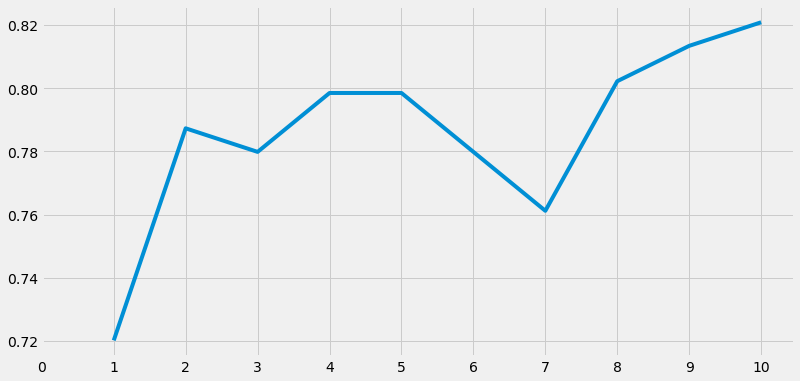

Accuracies for different values of n are: [0.72014925 0.78731343 0.77985075 0.79850746 0.79850746 0.77985075
 0.76119403 0.80223881 0.81343284 0.82089552] with the max value as  0.8208955223880597


In [137]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    knn=KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(knn_pred,y_test)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### We see that, Radial SVM and KNN have the best Accuracy Scores

#### Let us apply Radial SVM on the Test Data

In [138]:
X_test = test_data

In [139]:
r_svm = SVC(kernel='rbf',C=1,gamma=0.1)
r_svm.fit(X_train,y_train)
r_svm_pred=r_svm.predict(X_test)

In [140]:
r_svm_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [141]:
submission = ({
    'PassengerId': PassengerId,
    'Survived': r_svm_pred
})

submisson_df = pd.DataFrame(submission)
submisson_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [142]:
submisson_df.to_csv('submission.csv')